In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to C:\Users\Priyanka
[nltk_data]     Malavade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Priyanka
[nltk_data]     Malavade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [4]:
import pandas as pd
df_combined=pd.read_csv(r'combined_news_dataset.csv')
preprocessed_review = preprocess_text(df_combined['text'].values)
df_combined['text'] = preprocessed_review

100%|██████████| 44898/44898 [1:45:13<00:00,  7.11it/s]  


In [5]:
df_combined.to_csv('preprocessed_news_dataset.csv', index=False)

In [7]:
df_combined=pd.read_csv(r'preprocessed_news_dataset.csv')
df_combined.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,on friday revealed former milwaukee sheriff da...,News,"December 30, 2017",FAKE


In [10]:
# Shuffling
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

In [13]:
df_combined

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,on friday revealed former milwaukee sheriff da...,News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced would ...,News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",FAKE
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies tuesday welcomed ...,worldnews,"August 22, 2017",REAL
44894,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,"August 22, 2017",REAL
44895,Minsk cultural hub becomes haven from authorities,minsk reuters in shadow disused sovietera fact...,worldnews,"August 22, 2017",REAL
44896,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017",REAL


In [15]:
df_combined.to_csv('preprocessed_news_dataset.csv', index=False)

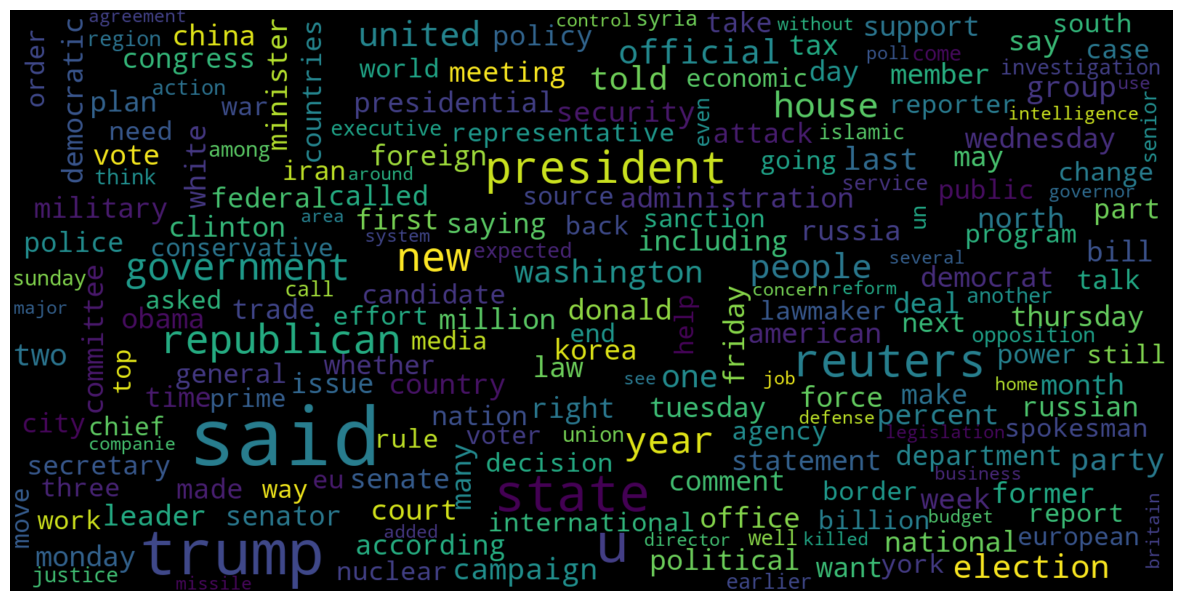

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Real news word cloud (assuming 'label' column is for fake/real classification)
consolidated = ' '.join(word for word in df_combined['text'][df_combined['label'] == 'REAL'].astype(str))

# Generate the word cloud
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False).generate(consolidated)

# Plotting the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


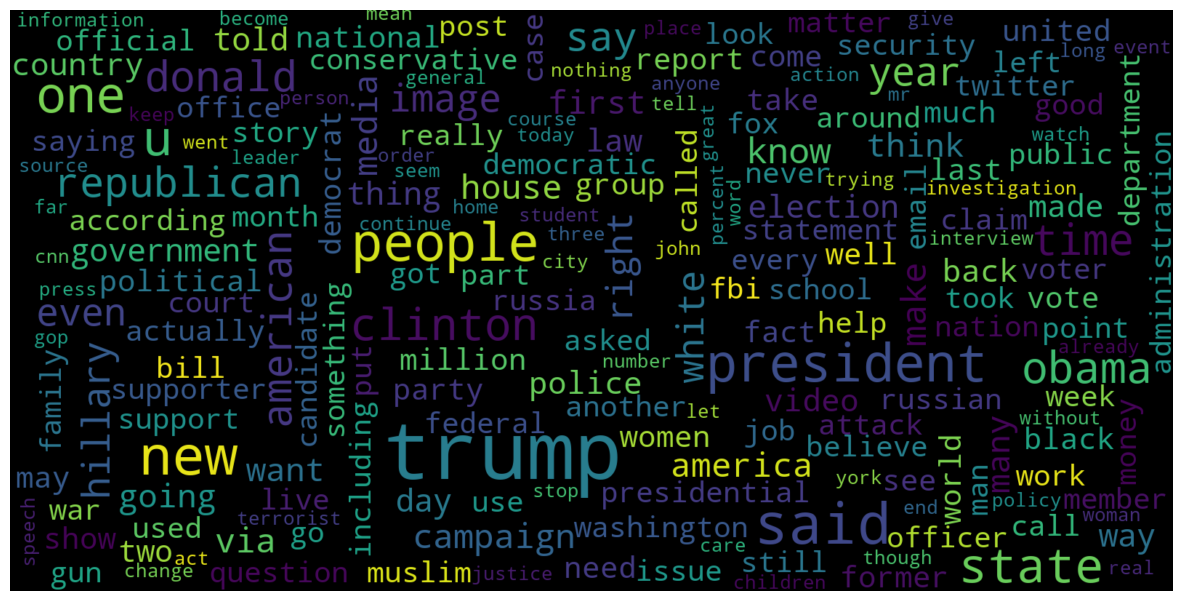

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fake news word cloud (assuming 'label' column contains 'FAKE' for fake news)
consolidated = ' '.join(word for word in df_combined['text'][df_combined['label'] == 'FAKE'].astype(str))

# Generate the word cloud
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False).generate(consolidated)

# Plotting the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


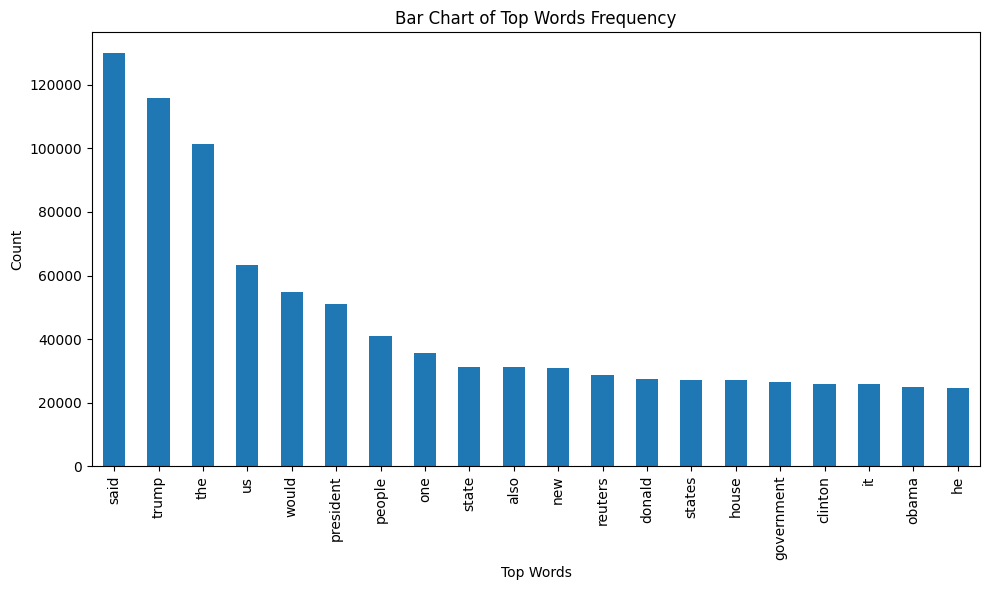

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Function to get top N words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Replace NaN values in 'text' column with an empty string
df_combined['text'] = df_combined['text'].fillna('')

# Get top 20 common words
common_words = get_top_n_words(df_combined['text'], 20)

# Create a dataframe with words and their counts
df1 = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plotting the bar chart for word frequency
df1.set_index('Word').plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency",
    legend=False
)

# Show the plot
plt.tight_layout()
plt.show()
